# Pyfilaments exploratory data analysis notebook

In [151]:
import sys
if 'init_modules' in globals().keys():
    # second or subsequent run: remove all but initially loaded modules
    for m in sys.modules.keys():
        if m not in init_modules:
            del(sys.modules[m])
else:
    # first run: find out which modules were initially loaded
    init_modules = sys.modules.keys()
    
import numpy as np
from scipy import signal
from scipy import interpolate
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import interpolate

import os
import pyfilaments.analysisutils as analysis
import imp
imp.reload(analysis)
%matplotlib notebook
plt.close('all')

# Figure parameters
from matplotlib import rcParams
from matplotlib import rc
from matplotlib import cm
from tqdm import tqdm

rc('font', family='sans-serif') 
rc('font', serif='Helvetica') 
rc('text', usetex='false') 
rcParams.update({'font.size': 12})

In [384]:
# Load data

root_folder = '/media/deepak/DEEPAK-1TB/ActiveFilaments_Simulations_Backup/BendingStiffnessSweeps/b0_4_activity_time_2000'
# root_folder = '/home/deepak/Dropbox/LacryModeling/ModellingResults/2021-03-05'
# bond length = 2.1
# file = '/home/deepak/LacryModelling_Local/SimulationData_ForAnalysis/2021-02-04/SimResults_Np_32_Shape_line_kappa_hat_3.75_k_15_b0_2.1_F_0_S_0_D_1.5_activityTime_750_simType_point/SimResults_00.hdf5'
# file = '/home/deepak/LacryModelling_Local/SimulationData_ForAnalysis/2021-02-04/SimResults_Np_32_Shape_line_kappa_hat_5.0_k_20_b0_2.1_F_0_S_0_D_1.5_activityTime_750_simType_point/SimResults_00.hdf5'
# file = '/home/deepak/LacryModelling_Local/SimulationData_ForAnalysis/2021-02-04/SimResults_Np_32_Shape_line_kappa_hat_6.25_k_25_b0_2.1_F_0_S_0_D_1.5_activityTime_750_simType_point/SimResults_00.hdf5'
# file = '/home/deepak/LacryModelling_Local/SimulationData_ForAnalysis/2021-02-04/SimResults_Np_32_Shape_line_kappa_hat_7.5_k_30_b0_2.1_F_0_S_0_D_1.5_activityTime_750_simType_point/SimResults_00.hdf5'
# file = '/home/deepak/LacryModelling_Local/SimulationData_ForAnalysis/2021-02-04/SimResults_Np_32_Shape_line_kappa_hat_12.5_k_50_b0_2.1_F_0_S_0_D_1.5_activityTime_750_simType_point/SimResults_01.hdf5'


# bond length = 4
# file = '/home/deepak/LacryModelling_Local/SimulationData_ForAnalysis/2021-02-06/SimResults_Np_32_Shape_line_kappa_hat_5.0_k_20_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point/SimResults_02.hdf5'
# file = '/home/deepak/LacryModelling_Local/SimulationData_ForAnalysis/2021-02-06/SimResults_Np_32_Shape_line_kappa_hat_7.5_k_30_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point/SimResults_01.hdf5'
# file = '/home/deepak/LacryModelling_Local/SimulationData_ForAnalysis/2021-02-06/SimResults_Np_32_Shape_line_kappa_hat_10.0_k_40_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point/SimResults_00.hdf5'
# file = '/home/deepak/LacryModelling_Local/SimulationData_ForAnalysis/2021-02-06/SimResults_Np_32_Shape_line_kappa_hat_12.5_k_50_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point/SimResults_01.hdf5'
# file = '/home/deepak/LacryModelling_Local/SimulationData_ForAnalysis/2021-02-07/SimResults_Np_32_Shape_line_kappa_hat_15.0_k_60_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point/SimResults_00.hdf5'
# file = '/home/deepak/LacryModelling_Local/SimulationData_ForAnalysis/2021-02-06/SimResults_Np_32_Shape_line_kappa_hat_17.5_k_70_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point/SimResults_00.hdf5'
# file = '/home/deepak/LacryModelling_Local/SimulationData_ForAnalysis/2021-02-07/SimResults_Np_32_Shape_line_kappa_hat_20.0_k_80_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point/SimResults_00.hdf5'
# file = '/home/deepak/LacryModelling_Local/SimulationData_ForAnalysis/2021-02-06/SimResults_Np_32_Shape_line_kappa_hat_25.0_k_100_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point/SimResults_01.hdf5'

# k = 65
# file = '/home/deepak/LacryModelling_Local/SimulationData/2021-02-09/SimResults_Np_32_Shape_line_kappa_hat_16.25_k_65_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point/SimResults_00.hdf5'
# k = 75
# file = '/home/deepak/LacryModelling_Local/SimulationData/2021-02-09/SimResults_Np_32_Shape_line_kappa_hat_18.75_k_75_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point/SimResults_00.hdf5'

# Irrational number for spring constant:
# file = '/home/deepak/LacryModelling_Local/SimulationData/2021-02-12/SimResults_Np_32_Shape_line_kappa_hat_17_k_69_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point/SimResults_00.hdf5'
# file = '/home/deepak/LacryModelling_Local/SimulationData/2021-02-12/SimResults_Np_32_Shape_line_kappa_hat_18_k_72_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point/SimResults_02.hdf5'
# file = '/home/deepak/LacryModelling_Local/SimulationData/2021-02-12/SimResults_Np_32_Shape_line_kappa_hat_19_k_75_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point/SimResults_02.hdf5'

# file = '/home/deepak/LacryModelling_Local/SimulationData_ForAnalysis/2021-02-04/SimResults_Np_32_Shape_line_kappa_hat_6.25_k_25_b0_2.1_F_0_S_0_D_1.5_activityTime_750_simType_point/SimResults_01.hdf5'
# file = '/home/deepak/LacryModelling_Local/SimulationData/2021-02-07/SimResults_Np_32_Shape_line_kappa_hat_6.25_k_25_b0_2.1_F_0_S_0_D_1.5_activityTime_750_simType_point/SimResults_00.hdf5'
# file = '/home/deepak/LacryModelling_Local/SimulationData/2021-02-07/SimResults_Np_32_Shape_line_kappa_hat_5.0_k_20_b0_2.1_F_0_S_0_D_1.5_activityTime_750_simType_point/SimResults_00.hdf5'


# Long dataset (750 cycles)
# file = '/home/deepak/LacryModelling_Local/SimulationData/2021-02-11/SimResults_Np_32_Shape_line_kappa_hat_17.5_k_70_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point/SimResults_01.hdf5'

# file = 'SimResults_Np_32_Shape_line_kappa_hat_12.5_k_50_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point/SimResults_01.hdf5'

# track_folder = 'SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point'
track_folder = 'SimResults_Np_32_Shape_line_kappa_hat_7.5_k_30_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point'
# track_folder = 'SimResults_Np_32_Shape_line_kappa_hat_9_k_35_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point'
# track_folder = 'SimResults_Np_32_Shape_line_kappa_hat_10.0_k_40_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point'
# track_folder = 'SimResults_Np_32_Shape_line_kappa_hat_11_k_45_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point'
# track_folder = 'SimResults_Np_32_Shape_line_kappa_hat_12.5_k_50_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point'
# track_folder = 'SimResults_Np_32_Shape_line_kappa_hat_14_k_55_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point'
# track_folder = 'SimResults_Np_32_Shape_line_kappa_hat_15.0_k_60_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point'
# track_folder = 'SimResults_Np_32_Shape_line_kappa_hat_16_k_62_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point'
# track_folder = 'SimResults_Np_32_Shape_line_kappa_hat_17_k_69_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point'
# track_folder = 'SimResults_Np_32_Shape_line_kappa_hat_17.5_k_70_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point'
# track_folder = 'SimResults_Np_32_Shape_line_kappa_hat_18_k_72_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point'
# track_folder = 'SimResults_Np_32_Shape_line_kappa_hat_19_k_75_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point'
# track_folder = 'SimResults_Np_32_Shape_line_kappa_hat_20.0_k_80_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point'
# track_folder = 'SimResults_Np_32_Shape_line_kappa_hat_21_k_85_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point'
# track_folder = 'SimResults_Np_32_Shape_line_kappa_hat_25.0_k_100_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point'

# track_folder = 'SimResults_Np_64_Shape_line_kappa_hat_18_k_70_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point'

file = 'SimResults_01.hdf5'



folder, *rest = os.path.split(os.path.join(root_folder, track_folder, file))

print(folder)

filament = analysis.analysisTools(file = os.path.join(root_folder, track_folder, file))

file_path = filament.analysis_folder




/media/deepak/DEEPAK-1TB/ActiveFilaments_Simulations_Backup/BendingStiffnessSweeps/b0_4_activity_time_2000/SimResults_Np_32_Shape_line_kappa_hat_7.5_k_30_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile data found!
Time step: 9.99990000099999
No:of particles : 32
No:of time points : 100001
Root path:  /media/deepak/DEEPAK-1TB/ActiveFilaments_Simulations_Backup/BendingStiffnessSweeps/b0_4_activity_time_2000/SimResults_Np_32_Shape_line_kappa_hat_7.5_k_30_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point
Data file SimResults_01.hdf5


In [4]:
# Calculate the filament length vs time

filament.compute_arc_length()

<IPython.core.display.Javascript object>


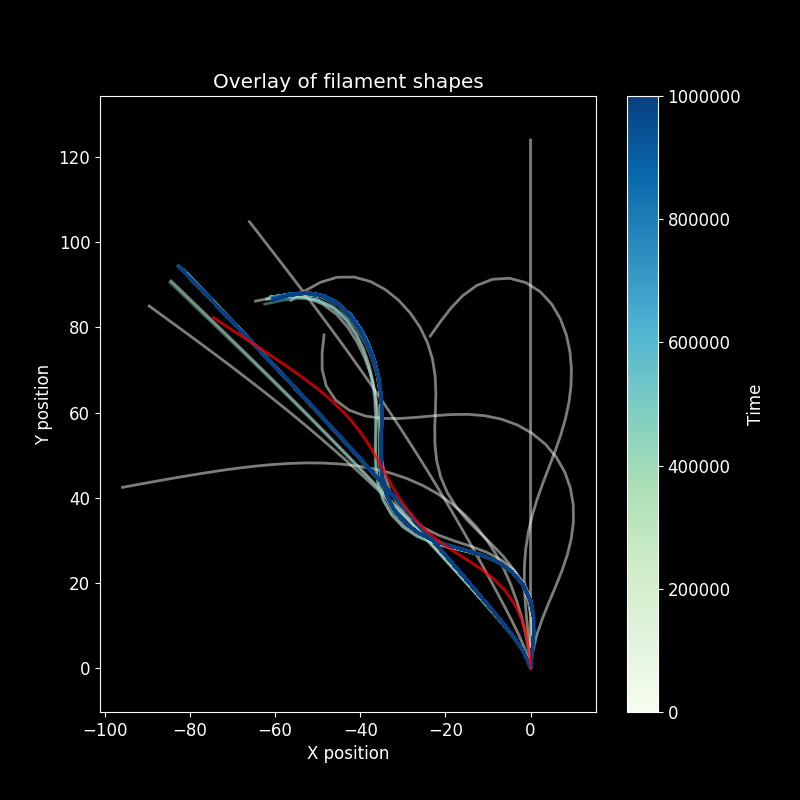

In [385]:
# Overlay of filament shapes
plt.style.use('dark_background')
filament.plot_filament_centerlines(stride = 100, save = True, color_by = 'Time')

# Tip search-coverage and unique locations sampled


Total unique positions sampled by tip: 1116.0
Total hits : 100001


<IPython.core.display.Javascript object>


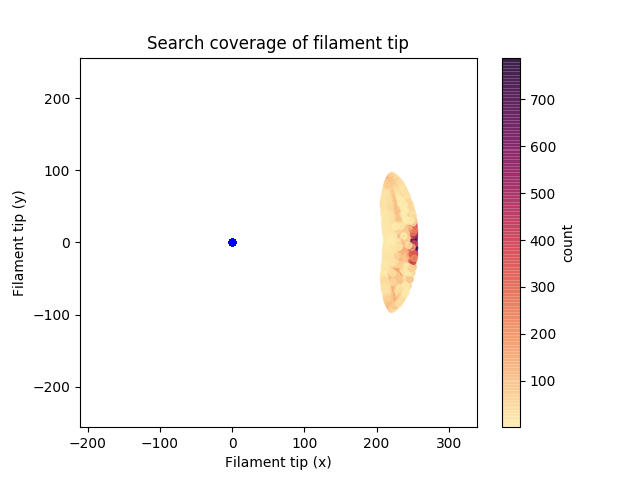

1


<IPython.core.display.Javascript object>


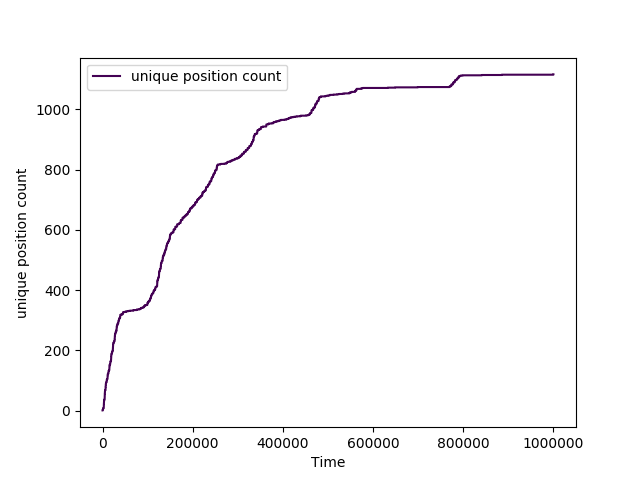

In [73]:
filament.filament_tip_coverage(save = True)
plt.style.use('default')
filament.plot_unique_tip_locations(save = True)
filament.plot_timeseries(var = ['unique position count'], save = True)

## Alternate plotting method for search clouds

<IPython.core.display.Javascript object>


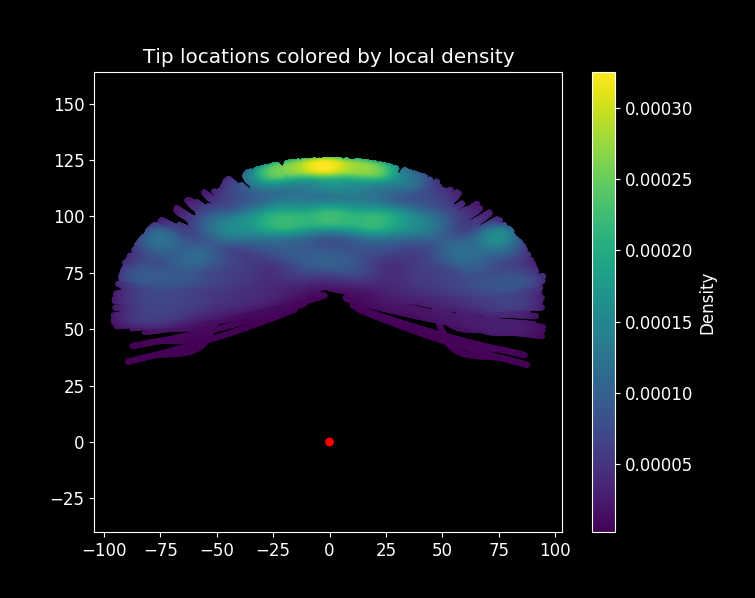

In [313]:
filament.plot_tip_scatter_density(save = True)

# Unique positions sampled (prelim results)

- k = 30, Total unique positions sampled by tip: 257.0
- k = 40, Total unique positions sampled by tip: 211.0
- k = 50, Total unique positions sampled by tip: 436.0
- k = 70, Total unique positions sampled by tip: 1423.0
- k = 100, Total unique positions sampled by tip: 460.0

# Tangent angle representation
We compute the coordinate-free tangent angle representation of the filament shape.

<IPython.core.display.Javascript object>


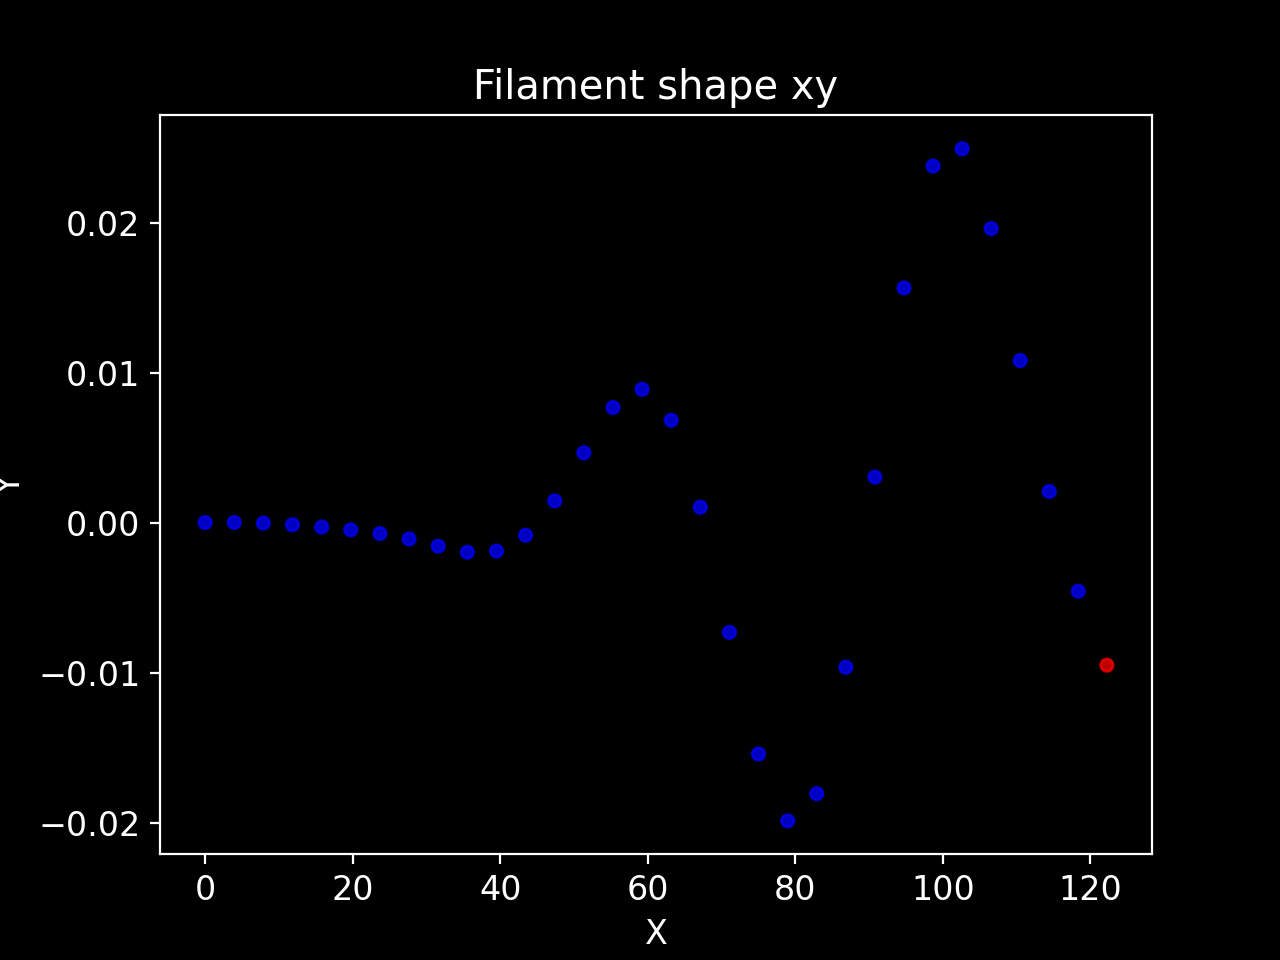

<IPython.core.display.Javascript object>


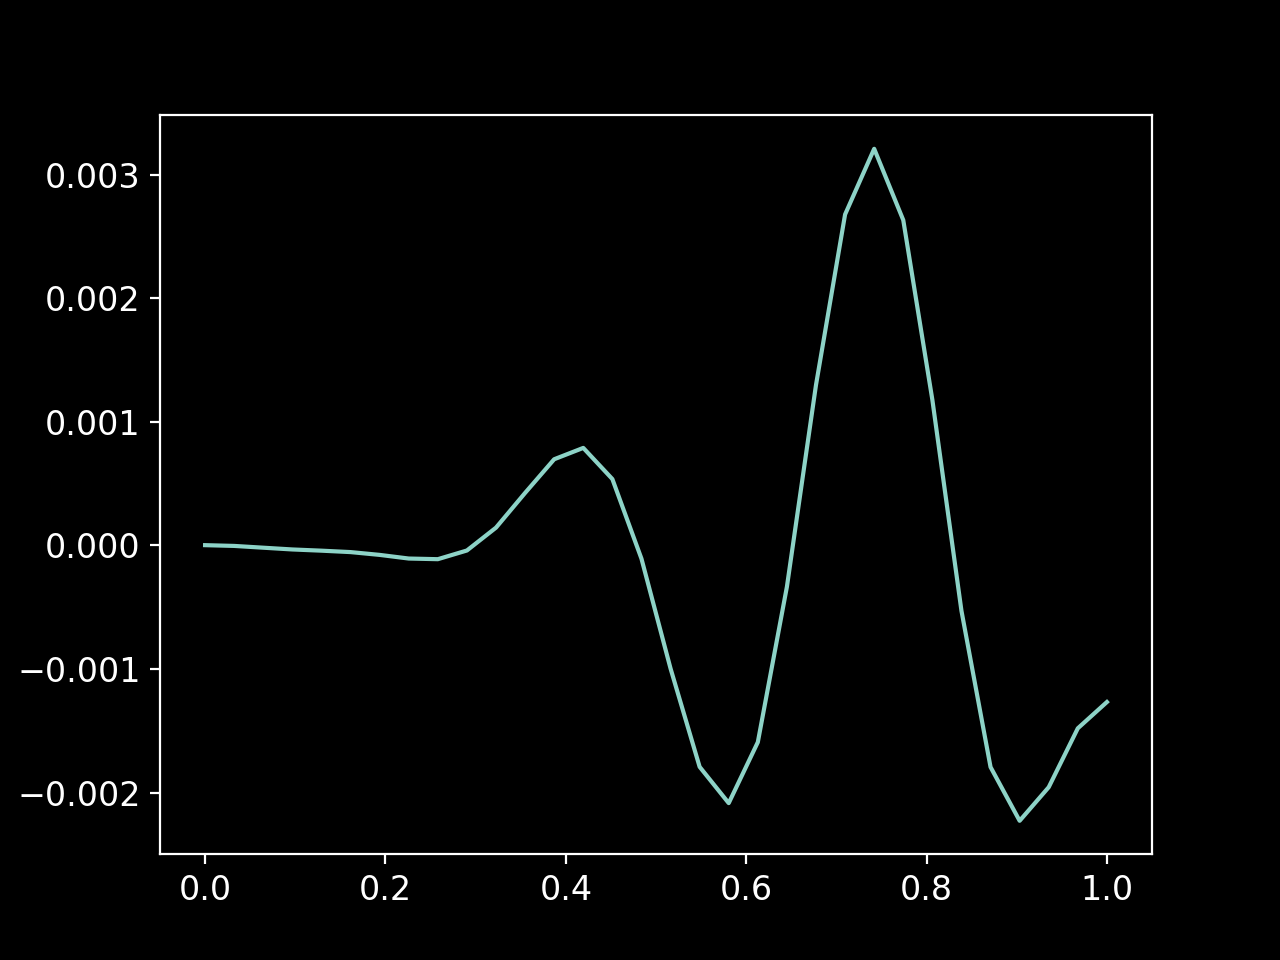

In [126]:
filament.r = filament.R[20, :]
filament.get_separation_vectors()
tangent_angles = filament.compute_tangent_angles()
arc_length_coordinate = np.linspace(0,1, filament.Np)


filament.plotFilament(r = filament.r)

plt.figure()
plt.plot(arc_length_coordinate, tangent_angles)
plt.show()

In [75]:
# Compute the tangent angle matrix
filament.compute_tangent_angle_matrix()

0
100000


<IPython.core.display.Javascript object>


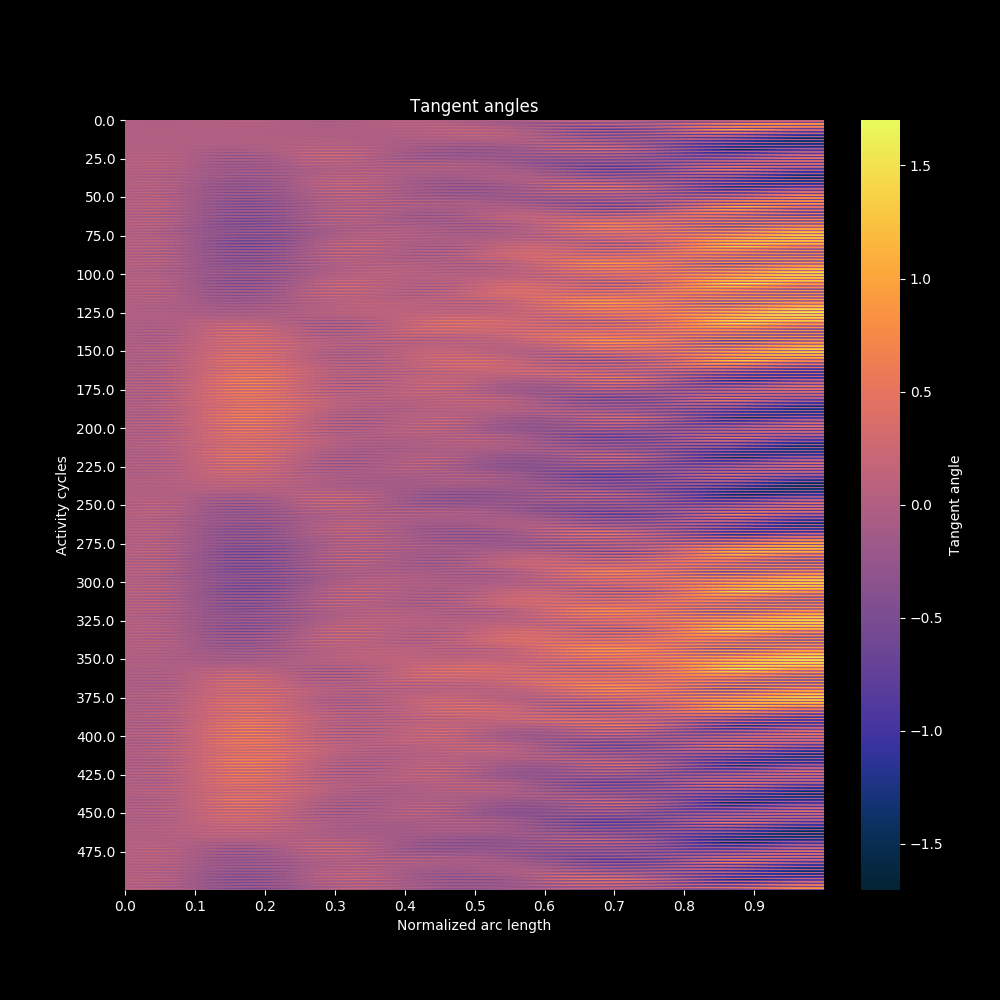

0
10000


<IPython.core.display.Javascript object>


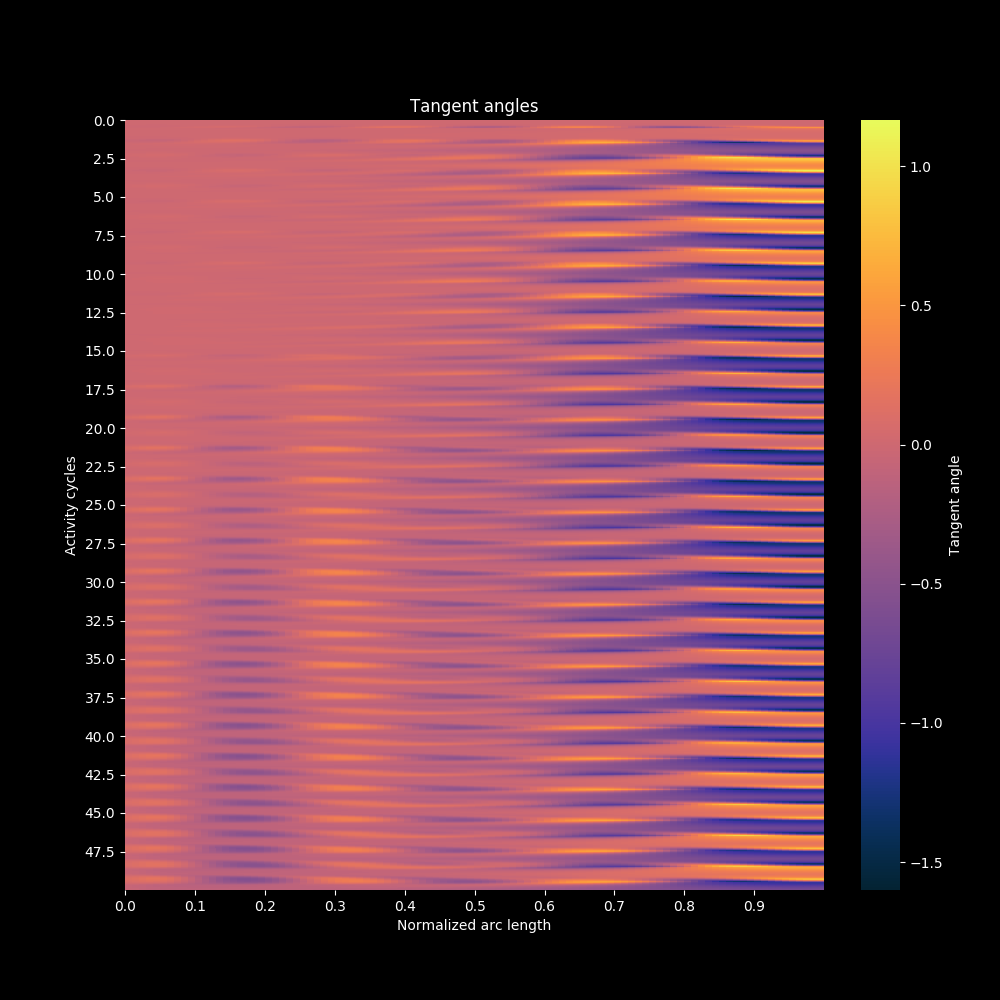

In [76]:
Tf = np.max(filament.Time)
plt.style.use('dark_background')
# Plot the tangent angle matrix
filament.plot_tangent_angle_matrix(save = True, start_time = 0, end_time = Tf)
filament.plot_tangent_angle_matrix(save = True, start_time = 0, end_time = 50*filament.activity_timescale )

## Tangent angle dynamics of the filament tip

<IPython.core.display.Javascript object>


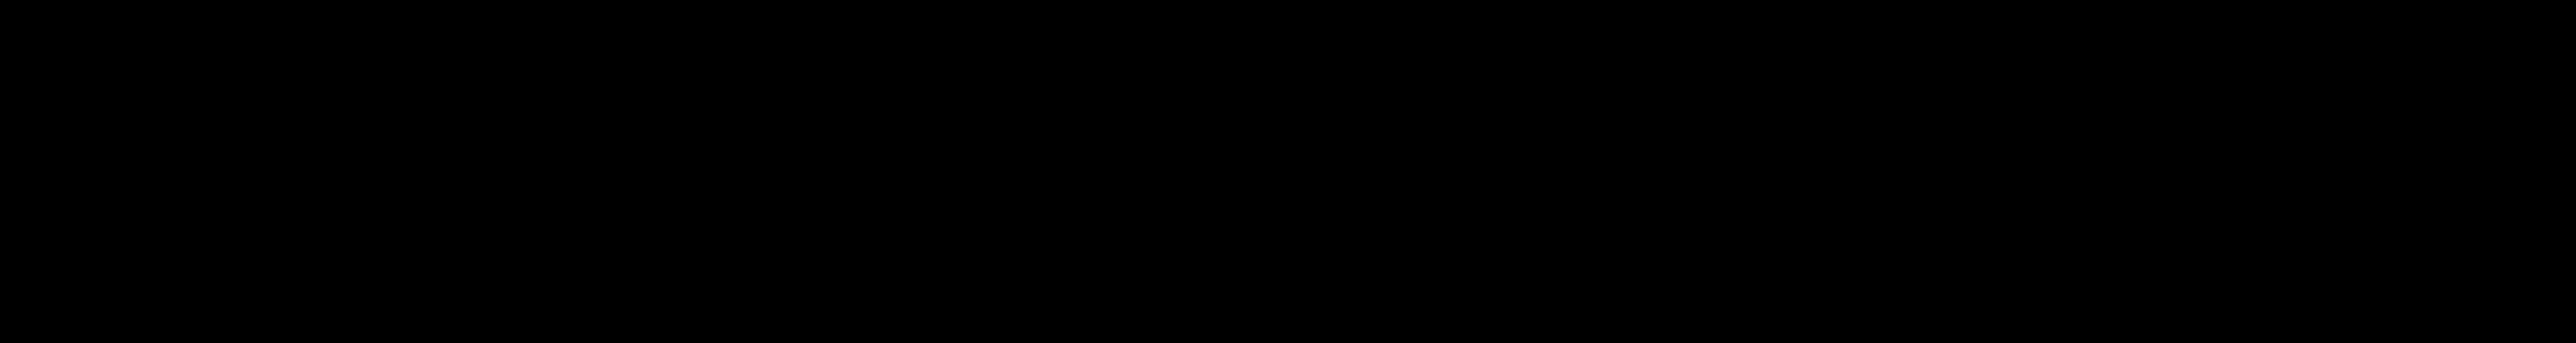

TypeError: 'NoneType' object is not subscriptable

In [376]:
# Plot the tangent angle of the filament tip over time
time_array = range(int(filament.Nt))
plt.figure(figsize = (30,4))
plt.plot(filament.tangent_angles_matrix[:, -1], linewidth = 1)
plt.xlabel('Time')
plt.ylabel('Tangent angle')
ax = plt.gca()
# ax.set_aspect(1)
plt.savefig(os.path.join(file_path, filament.dataName[:-5]+'TangentAngle_At_Tip.png'), dpi = 300)
plt.show()

# Shape covariance and PCA

No:of spatial points: 100
No:of time points: 100001
(100001, 100)
(100001, 100)


<IPython.core.display.Javascript object>


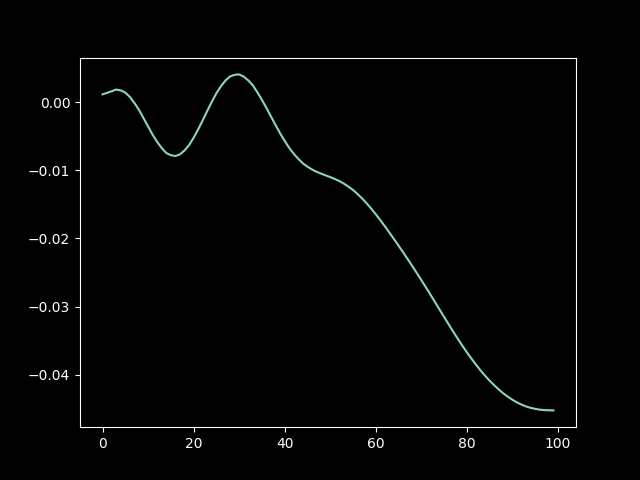

<IPython.core.display.Javascript object>


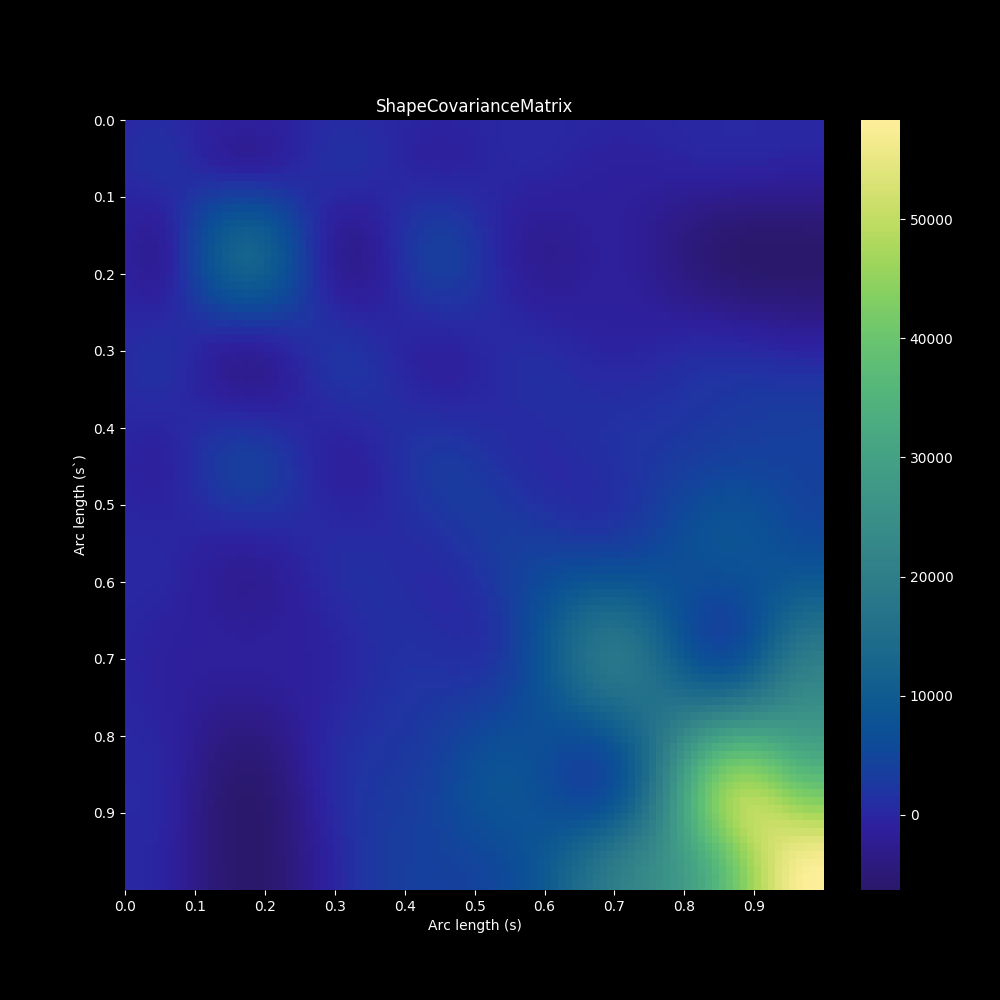

In [78]:
# Compute the shape covariance matrix
filament.compute_shape_covariance_matrix()

# Plot the mean tangent angle vector
plt.figure()
plt.plot(filament.phi_0)
plt.show()

filament.plot_shape_covariance_matrix(save = False)

# Eigen-decompisition of the covariance matrix

In [79]:
d, v = np.linalg.eigh(filament.covariance_matrix)


<IPython.core.display.Javascript object>


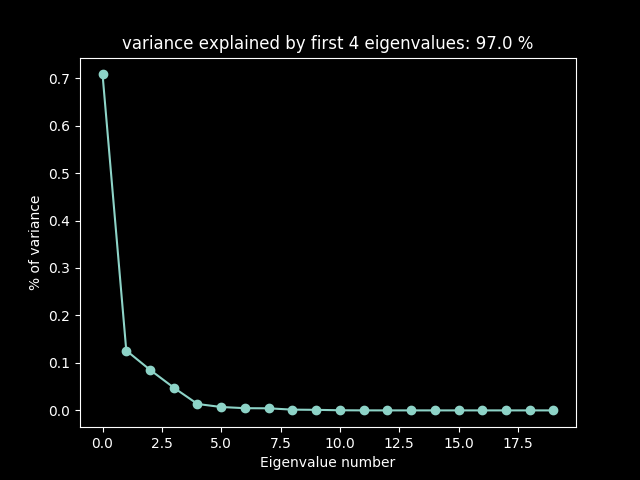

% of variance explained by first 4 eigenvalues: 96.7211368375979


In [81]:
# Plot the eigenvalue spectrum
idx_sorted = np.argsort(-np.real(d))
d_sorted = np.real(d[idx_sorted])

d_normalized = d_sorted/np.sum(d_sorted)


n_sig_eigenvalues = 4
plt.figure()
plt.plot(d_normalized[0:20], marker = 'o')
plt.xlabel('Eigenvalue number')
plt.ylabel('% of variance')
# plt.title('Eigenvalue spectrum')
plt.title('variance explained by first {} eigenvalues: {} %'.format(n_sig_eigenvalues, round(100*np.sum(d_normalized[0:n_sig_eigenvalues]))))
plt.savefig(os.path.join(file_path, 'EigvalueSpectrum.png'), dpi = 300)
plt.show()

print('% of variance explained by first {} eigenvalues: {}'.format(n_sig_eigenvalues, 100*np.sum(d_normalized[0:n_sig_eigenvalues])))


In [82]:
# Eigenvectors corresponding to the sorted eigenvalues
eigenvectors_sorted = v[:, idx_sorted]

eigenvectors_sig = eigenvectors_sorted[:,0:n_sig_eigenvalues]

print(eigenvectors_sorted)

[[ 7.24319222e-04  5.30805985e-03 -3.67992150e-02 ... -4.99726551e-06
   0.00000000e+00  0.00000000e+00]
 [ 6.47992811e-04  6.53552347e-03 -4.32044669e-02 ...  9.09226767e-02
  -3.35325061e-02  7.29794037e-02]
 [ 3.64608422e-04  8.07913600e-03 -4.95297527e-02 ... -1.82766167e-01
   6.71886587e-02 -1.44256960e-01]
 ...
 [ 2.24213227e-01 -6.06520718e-02  1.08478446e-02 ...  1.14894653e-01
  -2.59788819e-01  6.13212046e-02]
 [ 2.24210717e-01 -6.89960332e-02  1.07659746e-02 ... -8.62693084e-02
  -3.55452526e-02 -2.34143901e-01]
 [ 2.24186286e-01 -7.32245442e-02  1.07201961e-02 ...  1.94420677e-02
   9.89432702e-02  1.34458737e-01]]


<IPython.core.display.Javascript object>


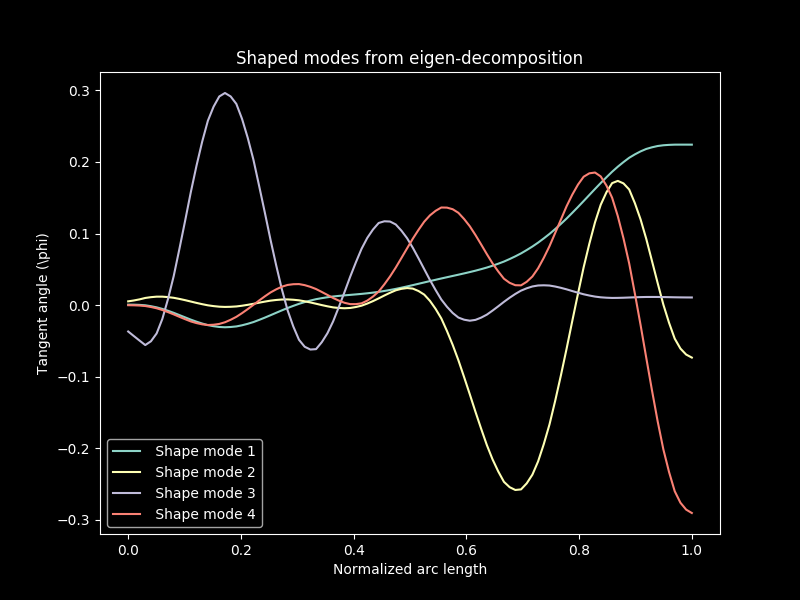

In [83]:
# Shapes corresponding to the eigenvectors
plt.figure(figsize = (8,6))
length_array = np.linspace(0, 1, len(eigenvectors_sig[:,0]))
for ii in range(n_sig_eigenvalues):
    
    plt.plot(length_array, eigenvectors_sorted[:, ii], label =' Shape mode {}'.format(ii+1))
    
plt.xlabel('Normalized arc length')
plt.ylabel('Tangent angle (\phi)')
plt.title('Shaped modes from eigen-decomposition')
plt.legend()
plt.savefig(os.path.join(file_path, filament.dataName[:-5]+'_ShapedModes.png'), dpi = 300)
plt.show()

# Projection of general filament shape onto the shape modes


In [84]:
from tqdm import tqdm
import pandas as pd

n_times, n_points = np.shape(filament.tangent_angles_matrix)
mode_amplitudes = np.zeros((n_times, n_sig_eigenvalues))
print(n_times, n_points)

matrix_A = eigenvectors_sig # n_points x n_eigvalues
matrix_A_inv = np.linalg.pinv(matrix_A)

for ii in tqdm(range(n_times)):

    rhs = filament.variance_matrix[ii, :]
    
    
    amplitudes_lst_sq = np.matmul(matrix_A_inv, rhs) # 
    
    for jj in range(n_sig_eigenvalues):
        mode_amplitudes[ii, jj] = amplitudes_lst_sq[jj]
      


 37%|███▋      | 36552/100001 [00:00<00:00, 365496.82it/s]

100001 100


100%|██████████| 100001/100001 [00:00<00:00, 382607.13it/s]


In [85]:
# Save the mode amplitude time-series
df_dict = {}
df_dict['Time'] = filament.Time

for ii in range(n_sig_eigenvalues):
    
    df_dict['Mode {} amplitude'.format(ii+1)] = mode_amplitudes[:,ii]
    
df_mode_amplitudes = pd.DataFrame(df_dict)
print(df_mode_amplitudes)

df_mode_amplitudes.to_csv(os.path.join(file_path, filament.dataName[:-5]+'_ModeAmplitudes.csv'))

             Time  Mode 1 amplitude  Mode 2 amplitude  Mode 3 amplitude  \
0             0.0          0.222216         -0.030009          0.048930   
1            10.0          0.222218         -0.030009          0.048930   
2            20.0          0.222218         -0.030008          0.048930   
3            30.0          0.222218         -0.030007          0.048930   
4            40.0          0.222219         -0.030006          0.048930   
...           ...               ...               ...               ...   
99996    999960.0         -2.776358          0.558534         -0.894798   
99997    999970.0         -2.766884          0.563338         -0.896539   
99998    999980.0         -2.757513          0.567974         -0.898305   
99999    999990.0         -2.748244          0.572447         -0.900094   
100000  1000000.0         -2.739076          0.576763         -0.901906   

        Mode 4 amplitude  
0               0.025234  
1               0.025233  
2               0.

<IPython.core.display.Javascript object>


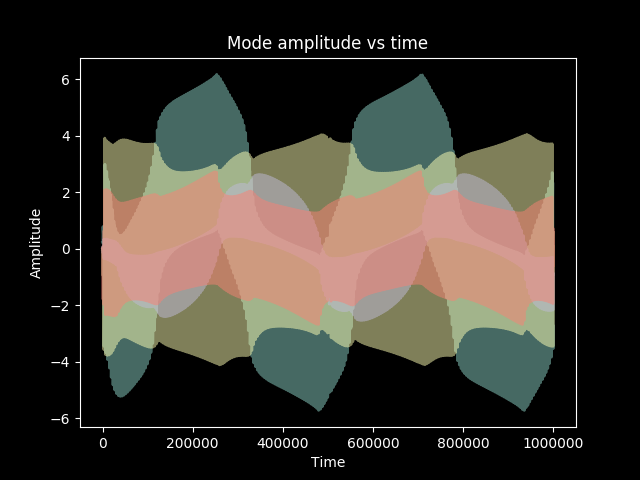

In [86]:
# Plot the dynamics of the mode amplitudes over time

plt.figure()

for ii in range(n_sig_eigenvalues):
    plt.plot(filament.Time, mode_amplitudes[:,ii],linewidth = 2, label = 'Mode {} amplitude'.format(ii+1), alpha = 0.5)
    
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Mode amplitude vs time')
plt.show()

    


<IPython.core.display.Javascript object>


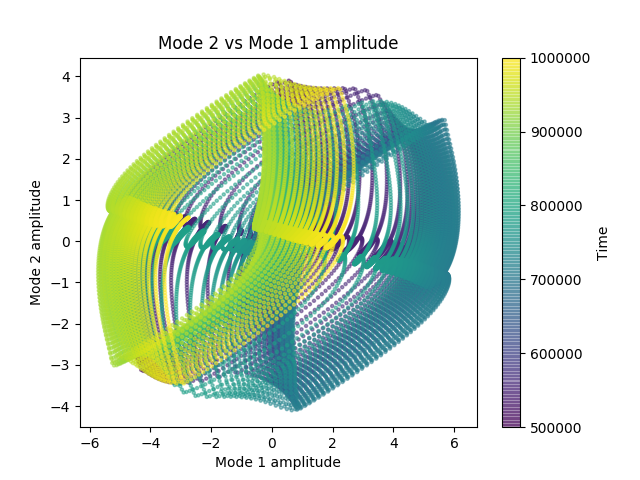

<IPython.core.display.Javascript object>


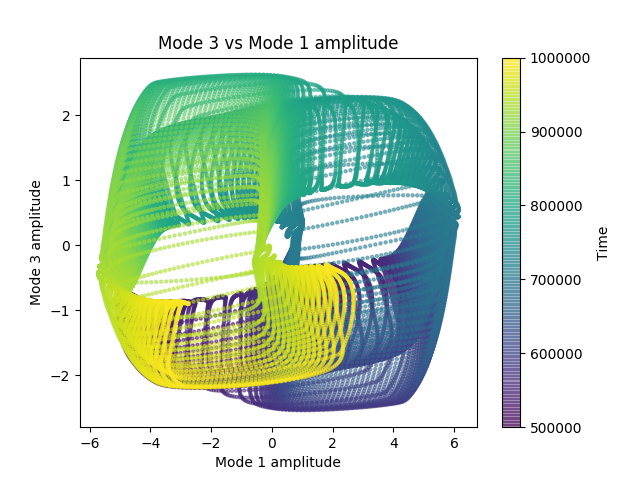

<IPython.core.display.Javascript object>


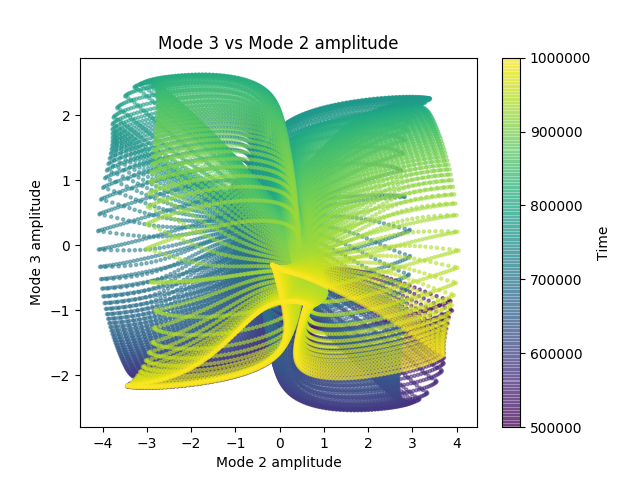

<IPython.core.display.Javascript object>


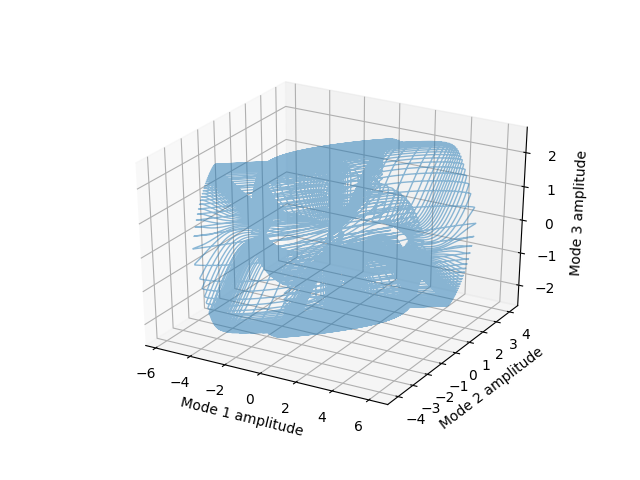

In [87]:
# Scatter-plots to visualize the phase dynamics
plt.style.use('default')

plt.figure()
ax1 = plt.scatter(mode_amplitudes[int(filament.Nt/2):,0], mode_amplitudes[int(filament.Nt/2):,1], 5, c = filament.Time[int(filament.Nt/2):], alpha = 0.5)
plt.xlabel('Mode 1 amplitude')
plt.ylabel('Mode 2 amplitude')
cbar = plt.colorbar(ax1)
cbar.ax.set_ylabel('Time')
plt.title('Mode 2 vs Mode 1 amplitude')
plt.savefig(os.path.join(file_path, filament.dataName[:-5]+'Mode2vsMode1.png'), dpi = 300)

plt.show()

plt.figure()
ax1 = plt.scatter(mode_amplitudes[int(filament.Nt/2):,0], mode_amplitudes[int(filament.Nt/2):,2], 5, c = filament.Time[int(filament.Nt/2):], alpha = 0.5)
plt.xlabel('Mode 1 amplitude')
plt.ylabel('Mode 3 amplitude')
cbar = plt.colorbar(ax1)
cbar.ax.set_ylabel('Time')
plt.title('Mode 3 vs Mode 1 amplitude')
plt.savefig(os.path.join(file_path, filament.dataName[:-5]+'Mode3vsMode1.png'), dpi = 300)
plt.show()

plt.figure()
ax1 = plt.scatter(mode_amplitudes[int(filament.Nt/2):,1], mode_amplitudes[int(filament.Nt/2):,2], 5, c = filament.Time[int(filament.Nt/2):], alpha = 0.5)
plt.xlabel('Mode 2 amplitude')
plt.ylabel('Mode 3 amplitude')
cbar = plt.colorbar(ax1)
cbar.ax.set_ylabel('Time')
plt.title('Mode 3 vs Mode 2 amplitude')
plt.savefig(os.path.join(file_path, filament.dataName[:-5]+'Mode3vsMode2.png'), dpi = 300)
plt.show()

# plt.style.use('dark_background')
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(mode_amplitudes[int(filament.Nt/2):,0], mode_amplitudes[int(filament.Nt/2):,1], mode_amplitudes[int(filament.Nt/2):,2], linewidth = 1, alpha = 0.5)
ax.set_xlabel('Mode 1 amplitude')
ax.set_ylabel('Mode 2 amplitude')
ax.set_zlabel('Mode 3 amplitude')
plt.savefig(os.path.join(file_path, filament.dataName[:-5]+'Mode3vsMode2vsMode1.png'), dpi = 300)

plt.show()

# Activity profile and activity phase

<IPython.core.display.Javascript object>


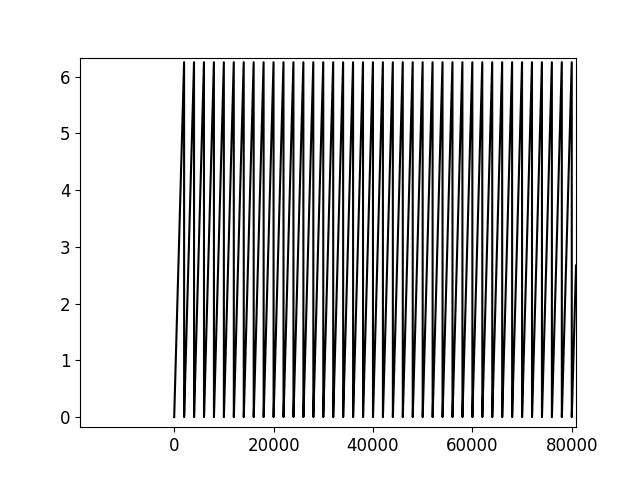

In [6]:
# Plot the phase vs time

plt.figure()
plt.plot(filament.Time, filament.derived_data['Phase'] , 'k-')
plt.show()

# Dynamics of filament base-tip and tip angles

In [386]:
filament.compute_base_tip_angle()
filament.compute_tip_angle()
filament.compute_arc_length()

<IPython.core.display.Javascript object>


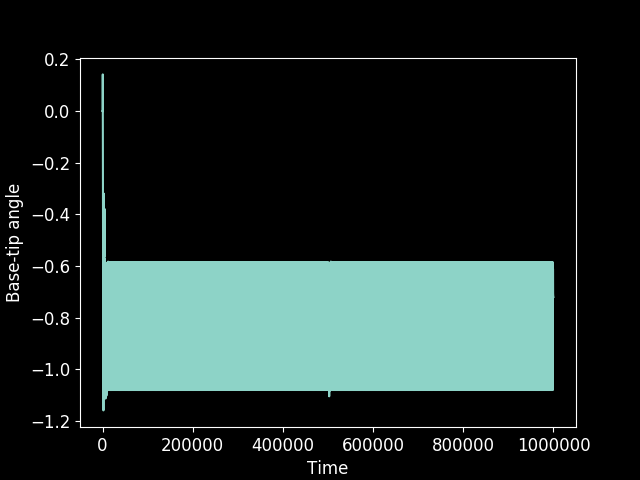

In [387]:
# Time series of filament base tip angle
plt.figure()
plt.plot(filament.Time, filament.derived_data['base tip angle'])
plt.xlabel('Time')
plt.ylabel('Base-tip angle')
plt.show()

<IPython.core.display.Javascript object>


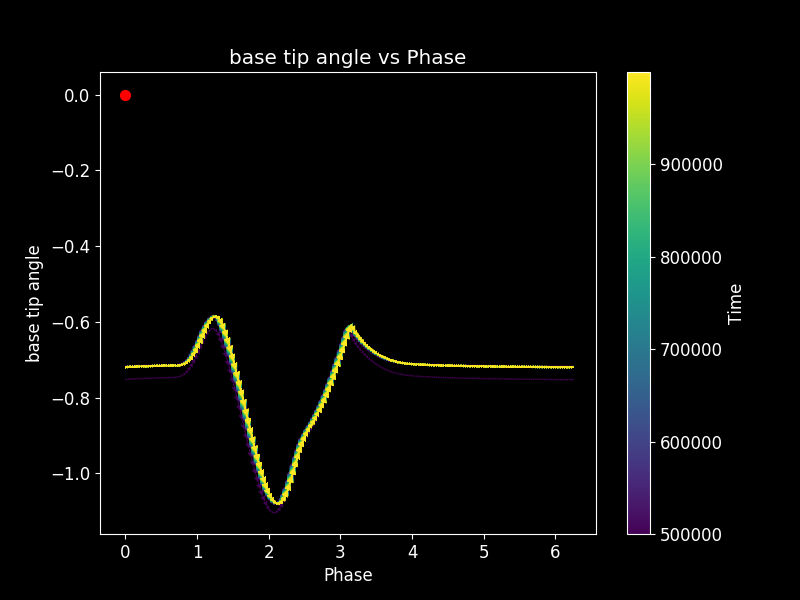

In [388]:
# Plot filament length and base-tip angle
filament.plot_phase_portrait('Phase', 'base tip angle', save = False, color_by = 'Time', start_index = int(filament.Nt/2))

<IPython.core.display.Javascript object>


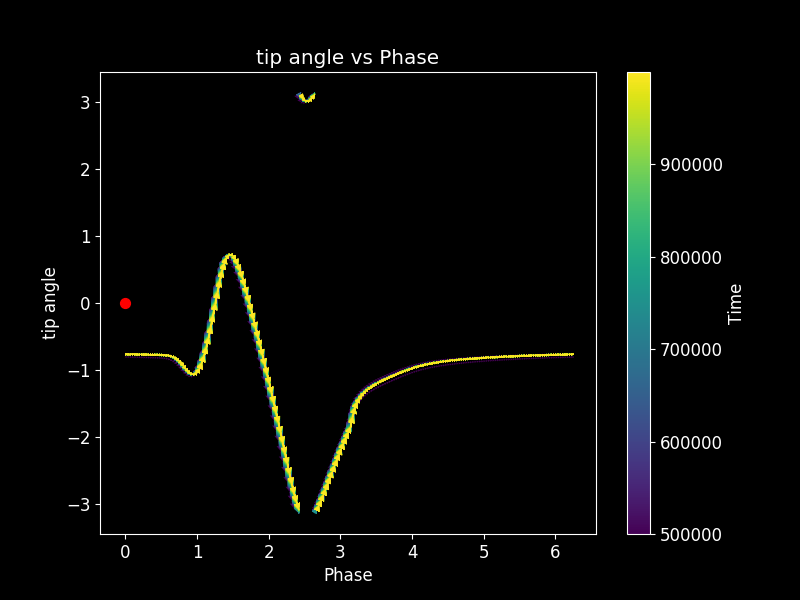

In [389]:
# Plot filament length and filament tip angle

filament.plot_phase_portrait('Phase', 'tip angle', save = False, color_by = 'Time', start_index = int(filament.Nt/2))

<IPython.core.display.Javascript object>


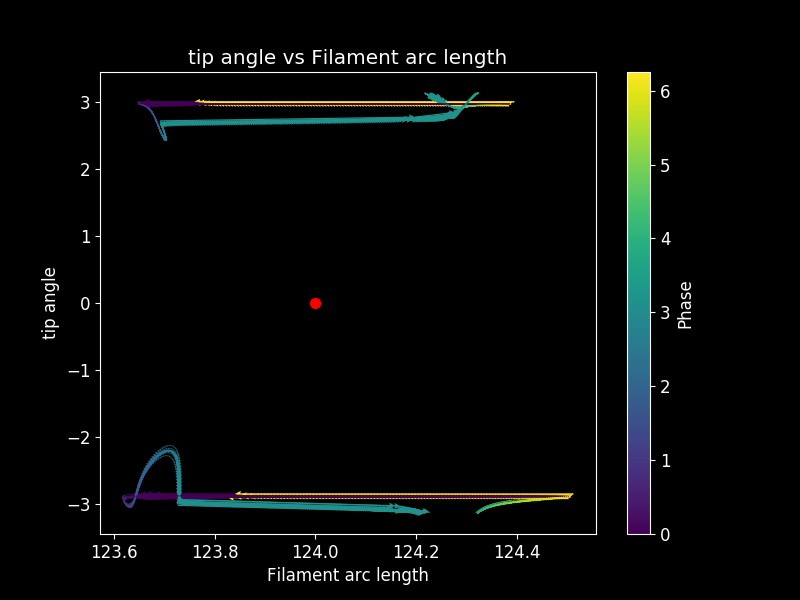

In [290]:
# Plot of tip angle vs Base tip angle
filament.plot_phase_portrait('Filament arc length', 'tip angle', save = False, color_by = 'Phase', start_index = int(filament.Nt/2))

## Find points at constant phase

In [381]:
# Find time points at a constant phase (stroboscopic)
# In the current activity profile, phase = 0 is start of compression, phase = pi is start of extension
phase_value = np.pi

# Smallest phase difference = 2*pi*delta_T/T
delta_phase = 2*np.pi*np.mean(filament.Time[1:]-filament.Time[:-1])/filament.activity_timescale

print(delta_phase)

abs_val_array = np.abs(filament.derived_data['Phase'] - phase_value)

constant_phase_indices = abs_val_array < 0.5*delta_phase

print(constant_phase_indices)
print(len(constant_phase_indices))
print(len(filament.derived_data['Phase'][constant_phase_indices]))

# assert(len(filament.derived_data['Phase'][constant_phase_indices]) == int(max(filament.Time)/filament.activity_timescale))


0.031415926535897934
[False False False ... False False False]
100001
500


# Return maps
Plot X_n+1 vs X_n for various quantities to assess the structure of the underlying aperiodic behavior.

<IPython.core.display.Javascript object>


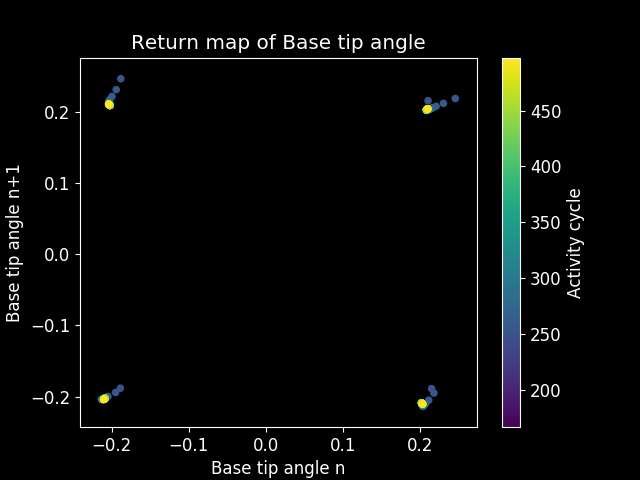

In [382]:
# Plot Return map of filament base-tip orientation

base_tip_angle_constant_phase = filament.derived_data['base tip angle'][constant_phase_indices]
time_array = filament.Time[constant_phase_indices]

n_array = len(base_tip_angle_constant_phase)

base_tip_angle_constant_phase = base_tip_angle_constant_phase[int(n_array/3):-1]
time_array = time_array[int(n_array/3):-1]

activity_cycle = time_array/filament.activity_timescale

title = 'Base tip angle'
plt.figure()

ax1 = plt.scatter(base_tip_angle_constant_phase[:-1], base_tip_angle_constant_phase[1:], 20, c = activity_cycle[:-1])
plt.xlabel('Base tip angle '+'n')
plt.ylabel('Base tip angle '+'n+1')
plt.title('Return map of '+ title)
cbar = plt.colorbar(ax1)
cbar.ax.set_ylabel('Activity cycle')
file_path = filament.analysis_folder
if(not os.path.exists(file_path)):
    os.makedirs(file_path)

file_name = filament.dataName[:-5] +'_'+title + str(round(phase_value,1))
plt.savefig(os.path.join(file_path, file_name + '.png'), dpi = 300, bbox_inches = 'tight')
plt.savefig(os.path.join(file_path, file_name + '.svg'), dpi = 300, bbox_inches = 'tight')

plt.show()

<IPython.core.display.Javascript object>


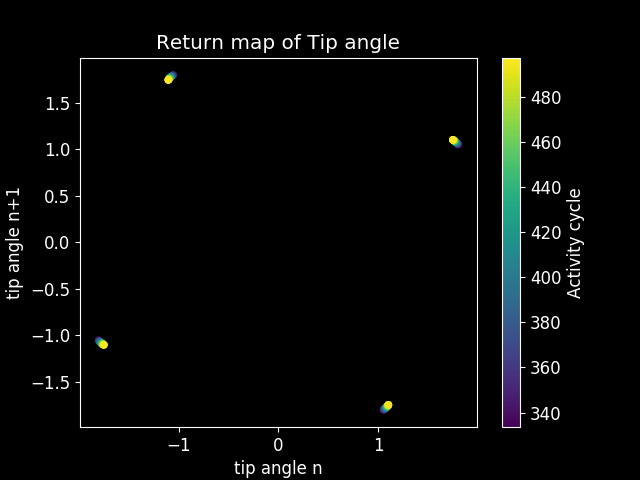

In [383]:
# Plot Return map of filament tip orientation

tip_angle_constant_phase = filament.derived_data['tip angle'][constant_phase_indices]
time_array = filament.Time[constant_phase_indices]

n_array = len(tip_angle_constant_phase)

tip_angle_constant_phase = tip_angle_constant_phase[int(n_array/1.5):-1]

time_array = time_array[int(n_array/1.5):-1]
activity_cycle = time_array/filament.activity_timescale

title = 'Tip angle'
plt.figure()

ax1 = plt.scatter(tip_angle_constant_phase[:-1], tip_angle_constant_phase[1:], 20, c = activity_cycle[:-1])
plt.xlabel('tip angle '+'n')
plt.ylabel('tip angle '+'n+1')
plt.title('Return map of '+ title)

cbar = plt.colorbar(ax1)
cbar.ax.set_ylabel('Activity cycle')
file_path = filament.analysis_folder
if(not os.path.exists(file_path)):
    os.makedirs(file_path)

file_name = filament.dataName[:-5] +'_'+title + str(round(phase_value,1))
plt.savefig(os.path.join(file_path, file_name + '.png'), dpi = 300, bbox_inches = 'tight')
plt.savefig(os.path.join(file_path, file_name + '.svg'), dpi = 300, bbox_inches = 'tight')

plt.show()

In [355]:
# Return maps of filament shapes before and after the compression
phase_value = 0
abs_val_array = np.abs(filament.derived_data['Phase'] - phase_value)
constant_phase_indices_0 = abs_val_array < 0.5*delta_phase
print(len(filament.derived_data['Phase'][constant_phase_indices_0]))

phase_value = np.pi
abs_val_array = np.abs(filament.derived_data['Phase'] - phase_value)
constant_phase_indices_pi = abs_val_array < 0.5*delta_phase
print(len(filament.derived_data['Phase'][constant_phase_indices_pi]))

phase_value = np.pi/2
abs_val_array = np.abs(filament.derived_data['Phase'] - phase_value)
constant_phase_indices_piby2 = abs_val_array < 0.5*delta_phase
print(len(filament.derived_data['Phase'][constant_phase_indices_piby2]))

phase_value = 3*np.pi/2
abs_val_array = np.abs(filament.derived_data['Phase'] - phase_value)
constant_phase_indices_3piby2 = abs_val_array < 0.5*delta_phase
print(len(filament.derived_data['Phase'][constant_phase_indices_3piby2]))

# Find the tip angles at the two constant phase values
tip_angle_0 = filament.derived_data['tip angle'][constant_phase_indices_0]
tip_angle_0 = tip_angle_0[:-1]
tip_angle_pi = filament.derived_data['tip angle'][constant_phase_indices_pi]
tip_angle_piby2 = filament.derived_data['tip angle'][constant_phase_indices_piby2]
tip_angle_3piby2 = filament.derived_data['tip angle'][constant_phase_indices_3piby2]


time_array = filament.Time[constant_phase_indices_0]
activity_cycle = time_array/filament.activity_timescale



501
500
500
500



## Plot of tip angle after compression vs angle before compression


<IPython.core.display.Javascript object>


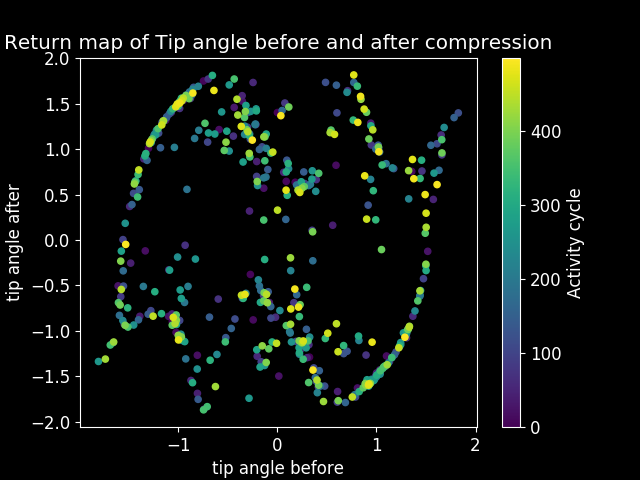

In [349]:

title = 'Tip angle before and after compression'
plt.figure()

ax1 = plt.scatter(tip_angle_0, tip_angle_pi, 20, c = activity_cycle[:-1])
plt.xlabel('tip angle '+'before')
plt.ylabel('tip angle '+'after')
plt.title('Return map of '+ title)

cbar = plt.colorbar(ax1)
cbar.ax.set_ylabel('Activity cycle')
file_path = filament.analysis_folder
if(not os.path.exists(file_path)):
    os.makedirs(file_path)

# file_name = filament.dataName[:-5] +'_'+title + str(round(phase_value,1))
# plt.savefig(os.path.join(file_path, file_name + '.png'), dpi = 300, bbox_inches = 'tight')
# plt.savefig(os.path.join(file_path, file_name + '.svg'), dpi = 300, bbox_inches = 'tight')

plt.show()

## Plot of tip angle during compression and before compression

<IPython.core.display.Javascript object>


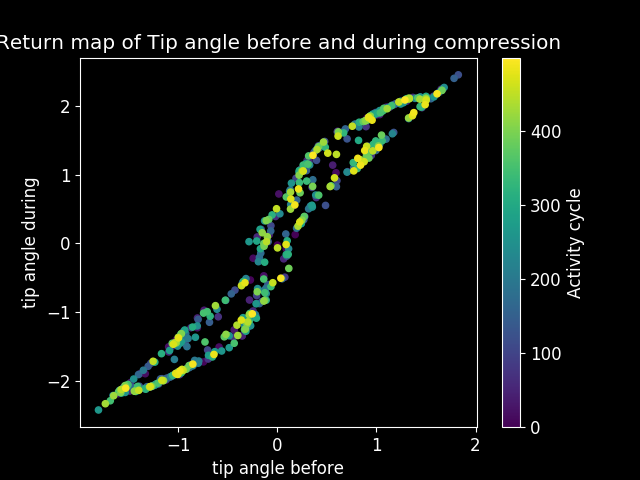

In [351]:
title = 'Tip angle before and during compression'
plt.figure()

ax1 = plt.scatter(tip_angle_0, tip_angle_piby2, 20, c = activity_cycle[:-1])
plt.xlabel('tip angle '+'before')
plt.ylabel('tip angle '+'during')
plt.title('Return map of '+ title)

cbar = plt.colorbar(ax1)
cbar.ax.set_ylabel('Activity cycle')
file_path = filament.analysis_folder
if(not os.path.exists(file_path)):
    os.makedirs(file_path)

# file_name = filament.dataName[:-5] +'_'+title + str(round(phase_value,1))
# plt.savefig(os.path.join(file_path, file_name + '.png'), dpi = 300, bbox_inches = 'tight')
# plt.savefig(os.path.join(file_path, file_name + '.svg'), dpi = 300, bbox_inches = 'tight')

plt.show()

## Plot of tip angle during extension and before extension

<IPython.core.display.Javascript object>


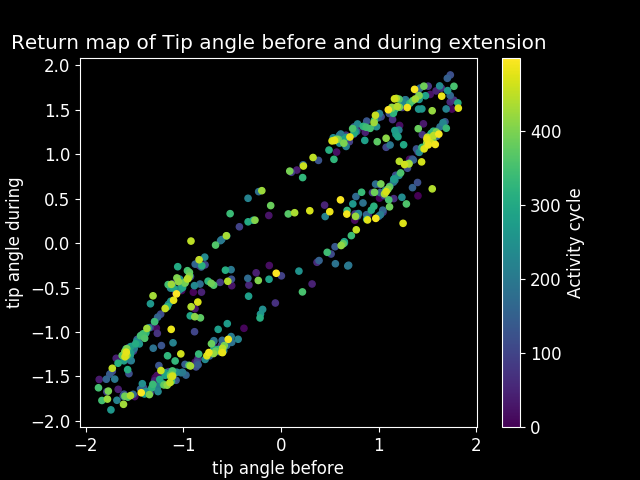

In [352]:
title = 'Tip angle before and during extension'
plt.figure()

ax1 = plt.scatter(tip_angle_pi, tip_angle_3piby2, 20, c = activity_cycle[:-1])
plt.xlabel('tip angle '+'before')
plt.ylabel('tip angle '+'during')
plt.title('Return map of '+ title)

cbar = plt.colorbar(ax1)
cbar.ax.set_ylabel('Activity cycle')
file_path = filament.analysis_folder
if(not os.path.exists(file_path)):
    os.makedirs(file_path)

# file_name = filament.dataName[:-5] +'_'+title + str(round(phase_value,1))
# plt.savefig(os.path.join(file_path, file_name + '.png'), dpi = 300, bbox_inches = 'tight')
# plt.savefig(os.path.join(file_path, file_name + '.svg'), dpi = 300, bbox_inches = 'tight')

plt.show()

# Axial and bending energy dynamics

<IPython.core.display.Javascript object>


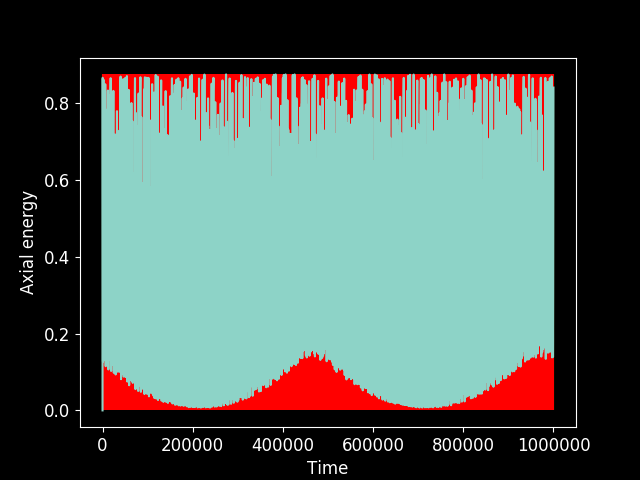

In [357]:
filament.compute_axial_bending_energy()



<IPython.core.display.Javascript object>


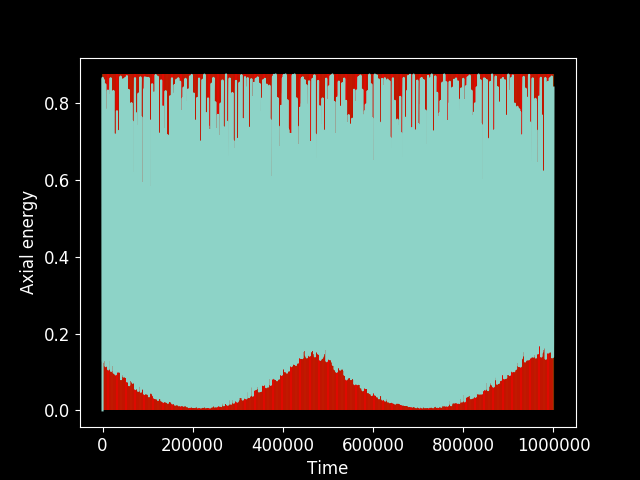

In [359]:

plt.figure()
plt.plot(filament.Time, filament.derived_data['Axial energy'])
# plt.plot(filament.Time, filament.derived_data['Bending energy'])

ymin = min(filament.derived_data['Axial energy'])
ymax = max(filament.derived_data['Axial energy'])
plt.vlines(filament.Time[constant_phase_indices_0],ymin, ymax,  'g', alpha = 0.5)
plt.vlines(filament.Time[constant_phase_indices_pi], ymin, ymax, 'r', alpha = 0.5)
plt.xlabel('Time')
plt.ylabel('Axial energy')
plt.show()

<IPython.core.display.Javascript object>


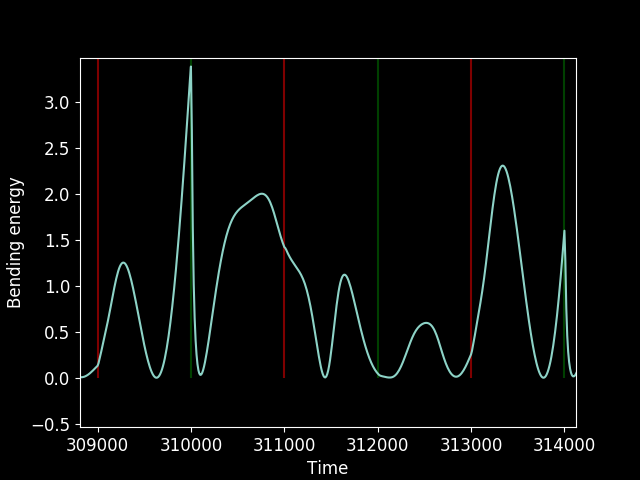

In [360]:
plt.figure()
plt.plot(filament.Time, filament.derived_data['Bending energy'])
# plt.plot(filament.Time, filament.derived_data['Bending energy'])

ymin = min(filament.derived_data['Bending energy'])
ymax = max(filament.derived_data['Bending energy'])
plt.vlines(filament.Time[constant_phase_indices_0],ymin, ymax,  'g', alpha = 0.5)
plt.vlines(filament.Time[constant_phase_indices_pi], ymin, ymax, 'r', alpha = 0.5)
plt.xlabel('Time')
plt.ylabel('Bending energy')
plt.show()